In [19]:
!nvidia-smi

Tue Mar  5 18:38:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0              26W /  70W |    697MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [20]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [1]:
!pip install ultralytics

from IPython import display
display.clear_output()

!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [2]:
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.18.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')
from ultralytics import YOLO
import numpy as np

Mounted at /content/drive


In [4]:
MODEL = 'yolov8x.pt'
model =YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 193MB/s]


YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


In [5]:
SOURCE_VIDEO_PATH = '/content/drive/MyDrive/CV Course/DATA/YOLO OBJECT TRACKER/straight cars.mp4'

In [12]:
CLASS_NAMES_DICT

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [7]:
CLASS_NAMES_DICT = model.model.names
selected_classes = [1,2,3,5,7]
selected_classes

[1, 2, 3, 5, 7]

In [16]:
#single frame

generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=2, text_scale=1)
iterator =iter(generator)
frame = next(iterator)

results = model(frame)[0]

detections = sv.Detections.from_ultralytics(results)
detections = detections[np.isin(detections.class_id,selected_classes)]
labels = [f'{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'  for _,_, confidence,class_id,_,_ in detections]
annotated_frame = box_annotator.annotate(scene = frame, detections=detections , labels=labels)
LINE_START =sv.Point(50,1500)
LINE_END =sv.Point(3840-50,1500)

annotated_frame = sv.draw_line(scene = annotated_frame, start = LINE_START, end =LINE_END,color = sv.Color.GREEN, thickness=5)
sv.plot_image(annotated_frame, (16,16))


0: 640x384 3 persons, 17 cars, 2 motorcycles, 2 buss, 62.1ms
Speed: 4.1ms preprocess, 62.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


Detections(xyxy=array([[     257.87,      1453.7,      527.18,      1860.8],
       [     705.16,      1443.5,      984.26,      1798.1],
       [     643.02,      1247.8,      812.33,      1440.6],
       [     348.79,      1270.9,      526.06,      1481.6],
       [     587.27,      944.16,      722.81,      1132.6],
       [    0.60287,      1308.7,      230.06,      1656.8],
       [     381.05,      1147.6,      516.27,      1288.8],
       [     268.74,      1050.9,       371.3,      1151.9],
       [     317.43,      986.39,      399.79,      1059.6],
       [      835.4,      1837.1,        1080,      1919.2],
       [     411.83,      1049.2,      516.46,      1159.8],
       [      547.7,      1220.4,      593.09,        1308],
       [     1.1004,      1803.4,      90.784,      1919.1],
       [     460.58,      1007.8,      540.25,      1087.3],
       [     371.67,       921.9,      435.78,      982.96],
       [     143.28,      1131.2,      313.22,      1320.6],
       [

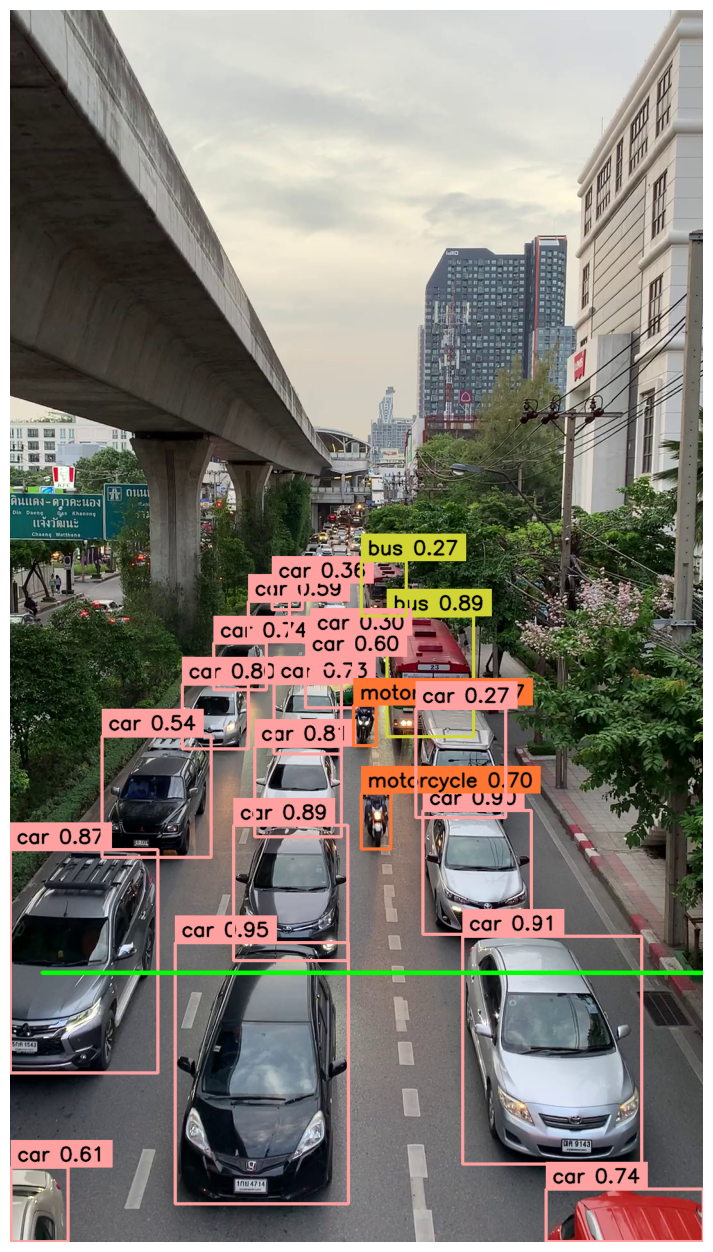

In [17]:
# labels = [f'{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'  for _,_, confidence,class_id,_,_ in detections]
# annotated_frame = box_annotator.annotate(scene = frame, detections=detections , labels=labels)
# LINE_START =sv.Point(50,1500)
# LINE_END =sv.Point(3840-50,1500)

# annotated_frame = sv.draw_line(scene = annotated_frame, start = LINE_START, end =LINE_END,color = sv.Color.GREEN, thickness=5)
# sv.plot_image(annotated_frame, (16,16))

In [22]:
LINE_START =sv.Point(0,1000)
LINE_END =sv.Point(3840-50,1000)
TARGET_VIDEO_PATH = f"{HOME}/vehicle-counting-result-with-counter.mp4"
TARGET_VIDEO_PATH

'/content/vehicle-counting-result-with-counter.mp4'

In [23]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)


VideoInfo(width=1080, height=1920, fps=29, total_frames=507)

In [24]:
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=29)
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=2, text_scale=0.5)
trace_annotator = sv.TraceAnnotator(thickness=4, trace_length=50)
line_zone_annotator = sv.LineZoneAnnotator(thickness=4,text_thickness=2, text_scale=0.5 )

def callback(frame:np.ndarray, index:int) -> np.ndarray:
  results = model(frame, verbose=False)[0]

  detections = sv.Detections.from_ultralytics(results)
  detections = detections[np.isin(detections.class_id,selected_classes)]

  detections = byte_tracker.update_with_detections(detections)

  labels = [f'{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'  for _,_, confidence,class_id,tracker_id,_ in detections]
  annotated_frame = trace_annotator.annotate(scene=frame.copy(),detections=detections )
  annotated_frame = box_annotator.annotate(scene = annotated_frame, detections=detections , labels=labels)
  line_zone.trigger(detections)
  return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)



sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)